In [1]:
"""
Yu Darvish analytics(2013 VS 2016)
トミー・ジョン手術前のベストシーズン(2013)とトミー・ジョン手術後のシーズン(2016/8/31まで)を比較
"""

%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300

In [2]:
# 元データを取得

pitch2013 = pd.read_csv('./output/player_stats/yu_darvish_2013_pitch.csv')
pitch2016 = pd.read_csv('./output/player_stats/yu_darvish_2016_pitch.csv')

In [3]:
#  行数をカウント. 行数=シーズン中に投げた投球数(になるようにデータセット作ってます)
print('Yu Darvish 2013 pitch:{}'.format(len(pitch2013)))

Yu Darvish 2013 pitch:3451


In [4]:
print('Yu Darvish 2016 pitch:{}'.format(len(pitch2016)))

Yu Darvish 2016 pitch:1122


In [5]:
# 次に、全投球の球種を円グラフ(パーセンテージ)にしてみる.
# 2016年からはストレート系(FF,FT,FC)が増えてるらしいが本当?
"""
球種の略称と正式名
    'CH': 'Change-up',
    'CU': 'Curveball',
    'EP': 'Ephuus',
    'FA': 'Fastball',
    'FC': 'Cut Fastball',
    'FF': 'four-seam Fastball',
    'FO': 'Forkball',
    'FS': 'Split-finger Fastball',
    'FT': 'two-seam Fastball',
    'KC': 'Knuckle Curve',
    'KN': 'Knuckleball',
    'SC': 'Screwball',
    'SI': 'Sinker',
    'SL': 'Slider',
    'UN': 'Unknown'

"""
pitch_type_2013 = pitch2013.pitch_type.groupby(pitch2013.pitch_type).count()
pitch_type_2016 = pitch2016.pitch_type.groupby(pitch2016.pitch_type).count()


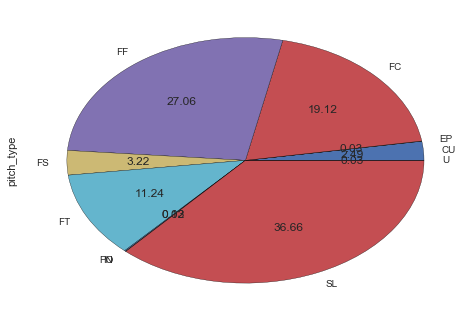

In [7]:
# グラフ出すよ! 2013
pitch_type_2013.plot.pie(autopct='%.2f')

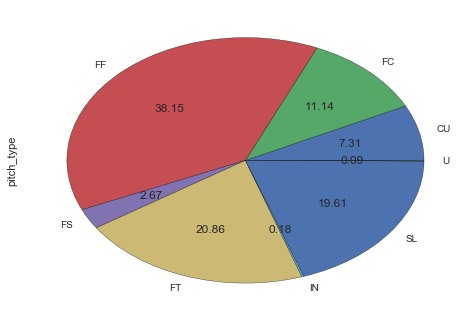

In [8]:
# グラフ出すよ! 2016
pitch_type_2016.plot.pie(autopct='%.2f')

In [18]:
"""
おお、確かにストレート系が大半を占めている...

しかしこれってキャッチャーのリードが関係あるのでは?
キャッチャー毎の傾向...はデータが無いのでちょっと見れない、残念orz

投球内容の変化(速度など)があったかちょっと見てみる

"""
# 初速/終速/回転数の各種統計(2013)
pitch2013[['start_speed', 'end_speed', 'spin_rate']].describe()

/usr/local/var/pyenv/versions/3.5.2/envs/py3.5.2_mlb-ichiro-2016/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


start_speed    end_speed    spin_rate
count  3450.000000  3450.000000  3450.000000
mean     86.871507    80.665304  1839.389920
std       6.663658     6.166043   493.457895
min      52.300000    49.900000   131.503000
25%            NaN          NaN          NaN
50%            NaN          NaN          NaN
75%            NaN          NaN          NaN
max      98.200000    91.600000  3791.897000

In [19]:
# 初速/終速/回転数の各種統計(2016)
pitch2016[['start_speed', 'end_speed', 'spin_rate']].describe()

/usr/local/var/pyenv/versions/3.5.2/envs/py3.5.2_mlb-ichiro-2016/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


start_speed    end_speed    spin_rate
count  1121.000000  1121.000000  1121.000000
mean     88.393756    82.336664  1875.690695
std       7.355215     6.805339   469.276425
min      59.600000    55.200000   243.444000
25%            NaN          NaN          NaN
50%            NaN          NaN          NaN
75%            NaN          NaN          NaN
max      98.100000    91.700000  3450.934000

In [20]:
# うーん...決定的な差がない、FF(four-seam Fastball)だけに絞ってみてみる
pitch2013_ff = pitch2013.query('pitch_type=="FF"')
pitch2016_ff = pitch2016.query('pitch_type=="FF"')

In [21]:
pitch2016

Unnamed: 0  Unnamed: 0.1 retro_game_id  year  month  day st_fl  \
0         220772          3320  TEX201605280  2016      5   28     F   
1         220773          3321  TEX201605280  2016      5   28     F   
2         220774          3322  TEX201605280  2016      5   28     F   
3         220775          3323  TEX201605280  2016      5   28     F   
4         220776          3324  TEX201605280  2016      5   28     F   
5         220777          3325  TEX201605280  2016      5   28     F   
6         220778          3326  TEX201605280  2016      5   28     F   
7         220779          3327  TEX201605280  2016      5   28     F   
8         220780          3328  TEX201605280  2016      5   28     F   
9         220781          3329  TEX201605280  2016      5   28     F   
10        220782          3330  TEX201605280  2016      5   28     F   
11        220783          3331  TEX201605280  2016      5   28     F   
12        220784          3332  TEX201605280  2016      5   28     F   
13        220785          3333  TEX201605280  2016      5   28     F   
14        220786          3334  TEX201605280  2016      5   28     F   
15        220787          3335  TEX201605280  2016      5   28     F   
16        220824          3372  TEX201605280  2016      5   28     F   
17        220825          3373  TEX201605280  2016      5   28     F   
18        220826          3374  TEX201605280  2016      5   28     F   
19        220827          3375  TEX201605280  2016      5   28     F   
20        220828          3376  TEX201605280  2016      5   28     F   
21        220829          3377  TEX201605280  2016      5   28     F   
22        220830          3378  TEX201605280  2016      5   28     F   
23        220844          3392  TEX201605280  2016      5   28     F   
24        220845          3393  TEX201605280  2016      5   28     F   
25        220846          3394  TEX201605280  2016      5   28     F   
26        220847          3395  TEX201605280  2016      5   28     F   
27        220848          3396  TEX201605280  2016      5   28     F   
28        220849          3397  TEX201605280  2016      5   28     F   
29        220850          3398  TEX201605280  2016      5   28     F   
30        220851          3399  TEX201605280  2016      5   28     F   
31        220852          3400  TEX201605280  2016      5   28     F   
32        220853          3401  TEX201605280  2016      5   28     F   
33        220854          3402  TEX201605280  2016      5   28     F   
34        220855          3403  TEX201605280  2016      5   28     F   
35        220856          3404  TEX201605280  2016      5   28     F   
36        220857          3405  TEX201605280  2016      5   28     F   
37        220858          3406  TEX201605280  2016      5   28     F   
38        220859          3407  TEX201605280  2016      5   28     F   
39        220860          3408  TEX201605280  2016      5   28     F   
40        220861          3409  TEX201605280  2016      5   28     F   
41        220862          3410  TEX201605280  2016      5   28     F   
42        220870          3418  TEX201605280  2016      5   28     F   
43        220871          3419  TEX201605280  2016      5   28     F   
44        220872          3420  TEX201605280  2016      5   28     F   
45        220873          3421  TEX201605280  2016      5   28     F   
46        220874          3422  TEX201605280  2016      5   28     F   
47        220875          3423  TEX201605280  2016      5   28     F   
48        220876          3424  TEX201605280  2016      5   28     F   
49        220877          3425  TEX201605280  2016      5   28     F   
50        220878          3426  TEX201605280  2016      5   28     F   
51        220879          3427  TEX201605280  2016      5   28     F   
52        220880          3428  TEX201605280  2016      5   28     F   
53        220881          3429  TEX201605280  2016      5   28     F   
54        220882          3430  TEX201605280  

In [22]:
# もう一度統計
pitch2013_ff[['start_speed', 'end_speed', 'spin_rate']].describe()

start_speed   end_speed    spin_rate
count   934.000000  934.000000   934.000000
mean     93.146360   86.153961  2249.863140
std       1.863902    1.861807   338.210374
min      87.800000   79.900000   131.503000
25%      91.800000   84.800000  2054.341000
50%      93.200000   86.200000  2256.855500
75%      94.500000   87.500000  2436.730500
max      98.200000   91.600000  3400.957000

In [23]:
pitch2016_ff[['start_speed', 'end_speed', 'spin_rate']].describe()

start_speed   end_speed    spin_rate
count   428.000000  428.000000   428.000000
mean     93.550467   86.885047  2192.016456
std       2.043422    1.925902   353.294113
min      87.100000   80.600000   940.495000
25%      92.300000   85.600000  2042.326750
50%      93.700000   87.000000  2242.674500
75%      95.000000   88.300000  2419.501250
max      98.100000   91.300000  2923.948000

In [24]:
# あれ、むしろ悪化してる?じゃあ投球の確率が倍になったFT(two-seam Fastbal)でみてみよう

In [25]:
# うーん...決定的な差がない、FF(four-seam Fastball)だけに絞ってみてみる
pitch2013_ft = pitch2013.query('pitch_type=="FT"')
pitch2016_ft = pitch2016.query('pitch_type=="FT"')

In [26]:
# もう一度統計
pitch2013_ft[['start_speed', 'end_speed', 'spin_rate']].describe()

start_speed   end_speed    spin_rate
count   388.000000  388.000000   388.000000
mean     92.266237   85.644588  2027.694098
std       1.933165    1.895540   484.039544
min      87.900000   80.700000   305.082000
25%      90.900000   84.300000  1750.298750
50%      92.100000   85.600000  2087.199000
75%      93.500000   87.000000  2361.609000
max      97.400000   90.700000  3791.897000

In [27]:
pitch2016_ft[['start_speed', 'end_speed', 'spin_rate']].describe()

start_speed   end_speed    spin_rate
count   234.000000  234.000000   234.000000
mean     92.486752   86.178205  1893.383137
std       2.055631    1.899016   334.986369
min      88.300000   82.200000   931.075000
25%      91.025000   85.000000  1701.061250
50%      92.300000   86.100000  1923.431000
75%      93.900000   87.400000  2111.368250
max      97.900000   91.700000  3450.934000

In [28]:
# (誤差の範囲ですが)ツーシームの球質は良くなってそう
# ここで視点を変えてストライクゾーンに入った投球を対象に見てみる
pitch2013_strike = pitch2013.query('pitch_res=="S" or (pitch_res=="X" and pa_event_cd in [2, 3])')

In [29]:
pitch2016_strike = pitch2016.query('pitch_res=="S" or (pitch_res=="X" and pa_event_cd in [2, 3])')

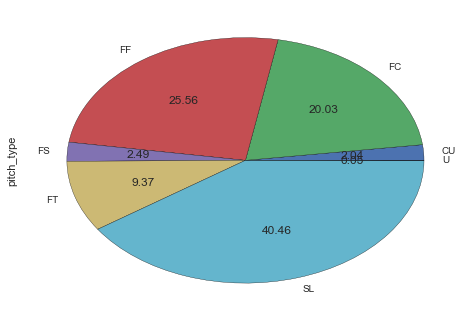

In [30]:
# グラフ化する(2013)
pitch2013_strike_pitch_type = pitch2013_strike.pitch_type.groupby(pitch2013_strike.pitch_type).count()
pitch2013_strike_pitch_type.plot.pie(autopct='%.2f')

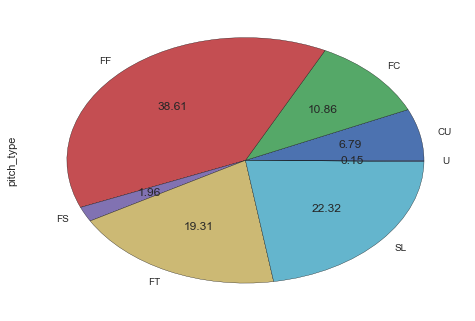

In [31]:
# グラフ化する(2016)
pitch2016_strike_pitch_type = pitch2016_strike.pitch_type.groupby(pitch2016_strike.pitch_type).count()
pitch2016_strike_pitch_type.plot.pie(autopct='%.2f')

In [32]:
# 明らかに真っ直ぐでストライクを稼いでる...
# ではここで(意地悪だが)ヒットにされたボールの球種を分類
pitch2013_hits = pitch2013.query('pitch_res=="X" and pa_event_cd in [20, 21, 22, 23]')
pitch2016_hits = pitch2016.query('pitch_res=="X" and pa_event_cd in [20, 21, 22, 23]')

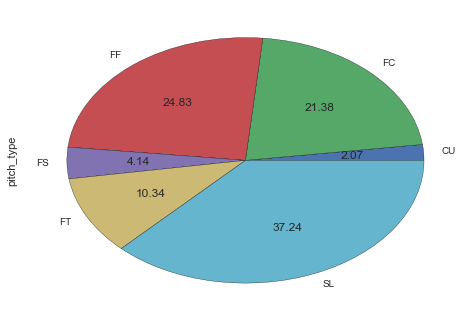

In [33]:
# グラフ化する(2013)
pitch2013_hits_pitch_type = pitch2013_hits.pitch_type.groupby(pitch2013_hits.pitch_type).count()
pitch2013_hits_pitch_type.plot.pie(autopct='%.2f')

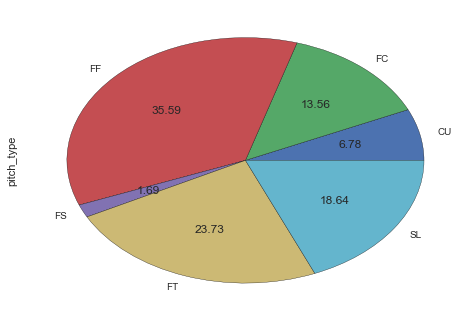

In [34]:
# グラフ化する(2016)
pitch2016_hits_pitch_type = pitch2016_hits.pitch_type.groupby(pitch2016_hits.pitch_type).count()
pitch2016_hits_pitch_type.plot.pie(autopct='%.2f')

In [35]:
# 投球比率が高い球はストライクもヒットも両方確率高いというつまらない結果が
# さらに視点を変えて、ホームランを打たれた投球のみに着目
pitch2013_hr = pitch2013.query('pitch_res=="X" and pa_event_cd in [23]')
pitch2016_hr = pitch2016.query('pitch_res=="X" and pa_event_cd in [23]')


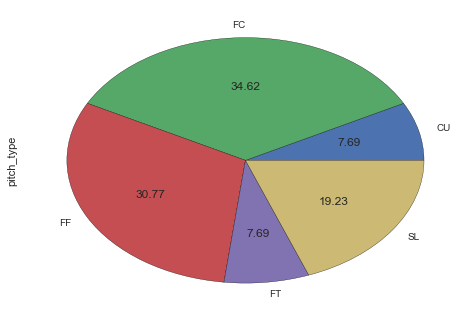

In [36]:
# グラフ化する(2013)
pitch2013_hr_pitch_type = pitch2013_hr.pitch_type.groupby(pitch2013_hr.pitch_type).count()
pitch2013_hr_pitch_type.plot.pie(autopct='%.2f')

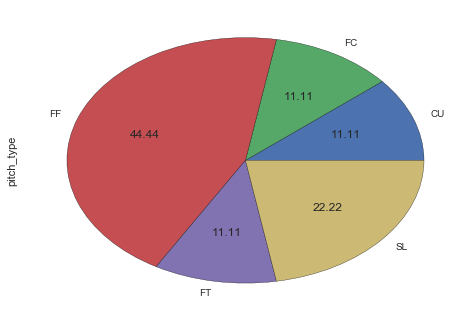

In [37]:
# グラフ化する(2016)
pitch2016_hr_pitch_type = pitch2016_hr.pitch_type.groupby(pitch2016_hr.pitch_type).count()
pitch2016_hr_pitch_type.plot.pie(autopct='%.2f')

In [38]:
pitch2013_hr_pitch_type

pitch_type
CU    2
FC    9
FF    8
FT    2
SL    5
Name: pitch_type, dtype: int64

In [39]:
pitch2016_hr_pitch_type

pitch_type
CU    1
FC    1
FF    4
FT    1
SL    2
Name: pitch_type, dtype: int64

In [40]:
# 2013年はカットボールで本塁打を打たれすぎてる?
# 2016年はカットボールの比率が落ちているので打たれていない?
# ちょっとイマイチなので、今度は球場別(テキサスとテキサス以外)でチェック
pitch2013_home = pitch2013.query('park_id==13')
pitch2016_home = pitch2016.query('park_id==13')

In [41]:
pitch2013_away = pitch2013.query('park_id!=13')
pitch2016_away = pitch2016.query('park_id!=13')

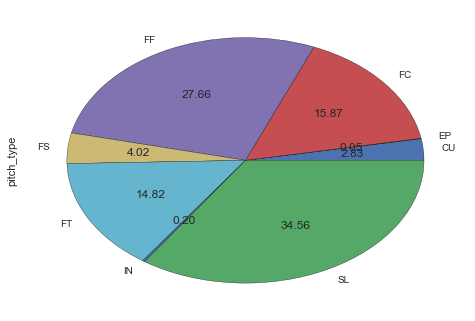

In [42]:
# グラフ化する(2013 home & away)
pitch2013_home_pitch_type = pitch2013_home.pitch_type.groupby(pitch2013_home.pitch_type).count()
pitch2013_home_pitch_type.plot.pie(autopct='%.2f')

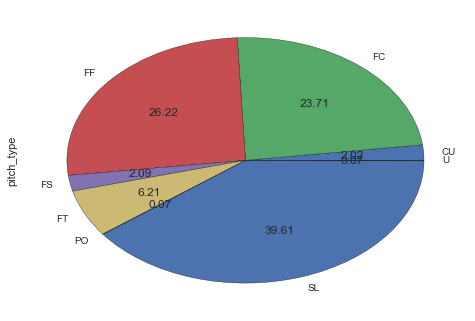

In [43]:
pitch2013_away_pitch_type = pitch2013_away.pitch_type.groupby(pitch2013_away.pitch_type).count()
pitch2013_away_pitch_type.plot.pie(autopct='%.2f')

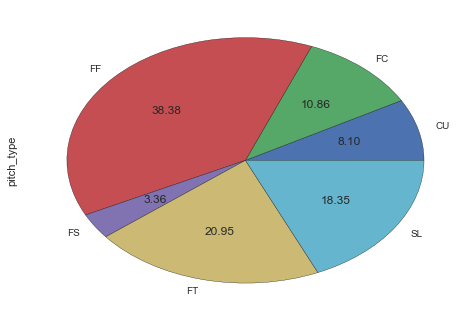

In [44]:
# グラフ化する(2016 home & away)
pitch2016_home_pitch_type = pitch2016_home.pitch_type.groupby(pitch2016_home.pitch_type).count()
pitch2016_home_pitch_type.plot.pie(autopct='%.2f')

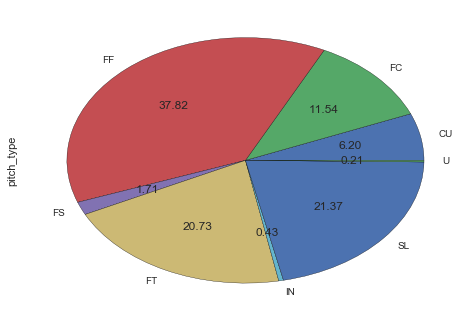

In [45]:
pitch2016_away_pitch_type = pitch2016_away.pitch_type.groupby(pitch2016_away.pitch_type).count()
pitch2016_away_pitch_type.plot.pie(autopct='%.2f')

In [46]:
# 2016年は変わらない、2013年はアウェイだと4/2シーム系が減ってカットボールとスライダーが増量という感じに

In [47]:
# 今度は定番「打者の左右」で投球の内容を見てみる、まずは2013年
pitch2013_bat_l = pitch2013.query('bat_hand_cd=="L"')
pitch2013_bat_r = pitch2013.query('bat_hand_cd=="R"')

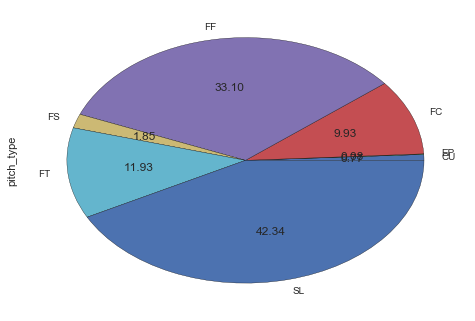

In [48]:
# まずは右
pitch2013_bat_r_pitch_type = pitch2013_bat_r.pitch_type.groupby(pitch2013_bat_r.pitch_type).count()
pitch2013_bat_r_pitch_type.plot.pie(autopct='%.2f')

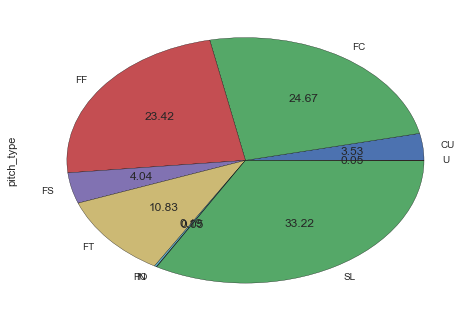

In [49]:
# では左
pitch2013_bat_l_pitch_type = pitch2013_bat_l.pitch_type.groupby(pitch2013_bat_l.pitch_type).count()
pitch2013_bat_l_pitch_type.plot.pie(autopct='%.2f')

In [50]:
# 対右打者はストレート系とスライダー、左打者はカットボールとスライダーが軸っぽい
# 2016年も見てみよう
pitch2016_bat_l = pitch2016.query('bat_hand_cd=="L"')
pitch2016_bat_r = pitch2016.query('bat_hand_cd=="R"')

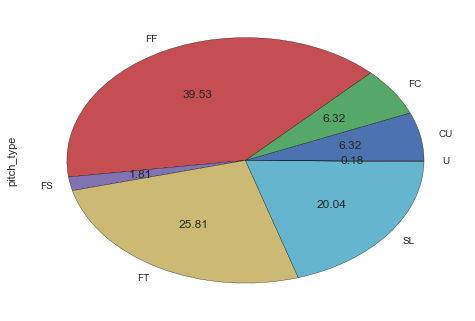

In [51]:
pitch2016_bat_r_pitch_type = pitch2016_bat_r.pitch_type.groupby(pitch2016_bat_r.pitch_type).count()
pitch2016_bat_r_pitch_type.plot.pie(autopct='%.2f')

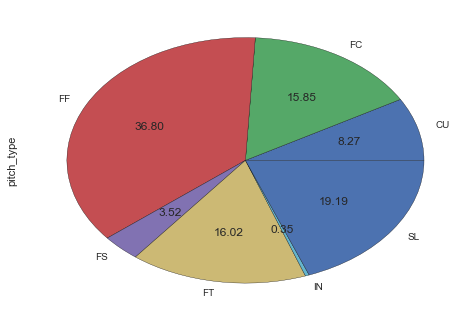

In [52]:
pitch2016_bat_l_pitch_type = pitch2016_bat_l.pitch_type.groupby(pitch2016_bat_l.pitch_type).count()
pitch2016_bat_l_pitch_type.plot.pie(autopct='%.2f')

In [53]:
# 対左打者でカットボールが有効な武器というのは変わってない、2013年以上に直球系を駆使しているっぽい

In [54]:
pitch2013_summary = pitch2013[['pitch_type', 'pitch_res']]

In [55]:
pitch2013_summary.pitch_type.groupby(pitch2013_summary.pitch_type).count()

pitch_type
CU      86
EP       1
FC     660
FF     934
FS     111
FT     388
IN       4
PO       1
SL    1265
U        1
Name: pitch_type, dtype: int64

In [56]:
pitch2013_summary

pitch_type pitch_res
0            FF         B
1            FF         B
2            FC         S
3            FC         S
4            SL         B
5            SL         S
6            FC         B
7            FC         S
8            FC         B
9            FC         S
10           SL         S
11           FC         S
12           CU         B
13           FC         B
14           FC         B
15           FC         X
16           FF         S
17           FF         B
18           FF         B
19           SL         S
20           SL         S
21           SL         B
22           SL         S
23           SL         S
24           FC         S
25           FC         B
26           FC         S
27           FT         S
28           SL         S
29           FF         S
30           FF         S
31           FF         S
32           FC         X
33           FC         B
34           FC         S
35           FC         B
36           FC         S
37           SL         S
38           FT         X
39           FC         S
40           CU         B
41           FC         S
42           SL         S
43           SL         B
44           SL         B
45           FC         S
46           FF         S
47           FF         S
48           FF         B
49           SL         S
50           FC         S
51           CU         S
52           SL         S
53           FF         B
54           SL         S
55           FT         S
56           SL         S
57           FS         B
58           FC         S
59           FC         S
60           FF         S
61           FC         B
62           SL         S
63           FC         B
64           FC         X
65           FC         S
66           FC         X
67           FF         S
68           FC         S
69           SL         S
70           FC         S
71           FC         B
72           SL         B
73           FC         S
74           SL         S
75           FC         S
76           FF         B
77           FC         X
78           CU         B
79           FC         S
80           FC         S
81           FF         X
82           FC         X
83           FC         S
84           FS         S
85           SL         S
86           FT         S
87           FF         B
88           SL         B
89           SL         S
90           FS         S
91           SL         B
92           FC         X
93           FC         S
94           SL         B
95           FF         B
96           SL         S
97           FF         B
98           SL         S
99           SL         S
100          SL         S
101          SL         S
102          FS         B
103          FC         S
104          FC         S
105          SL         S
106          SL         X
107          FC         S
108          FC         X
109          FC         X
110          FC         X
111          FF         S
112          FC         B
113          SL         B
114          FF         B
115          FC         B
116          FC         S
117          FC         S
118          SL         B
119          SL         B
120          FC         B
121          FF         B
122          FF         B
123          FF         B
124          FC         S
125          SL         X
126          FF         B
127          SL         B
128          FC         S
129          SL         X
130          FF         S
131          SL         S
132          FF         S
133          FF         B
134          FC         S
135          FC         X
136          FC         S
137          FT         X
138          FF         B
139          SL         B
140          FC         S
141          SL         B
142          FF         B
143          FF         S
144          FC         S
145          FF         S
146          FF         S
147          FC         B
148          FC         S
149          FT         B
...         ...       ...
3301         FF         B
3302         FF         X
3

In [62]:
pitch2016 = pd.read_csv('./output/player_stats/yu_darvish_2016_pitch.csv')

In [63]:
pitch2016['game_day'] = pd.to_datetime(pitch2016[['year', 'month', 'day']])

In [64]:
# pitch2016

Unnamed: 0  Unnamed: 0.1 retro_game_id  year  month  day st_fl  \
0         220772          3320  TEX201605280  2016      5   28     F   
1         220773          3321  TEX201605280  2016      5   28     F   
2         220774          3322  TEX201605280  2016      5   28     F   
3         220775          3323  TEX201605280  2016      5   28     F   
4         220776          3324  TEX201605280  2016      5   28     F   
5         220777          3325  TEX201605280  2016      5   28     F   
6         220778          3326  TEX201605280  2016      5   28     F   
7         220779          3327  TEX201605280  2016      5   28     F   
8         220780          3328  TEX201605280  2016      5   28     F   
9         220781          3329  TEX201605280  2016      5   28     F   
10        220782          3330  TEX201605280  2016      5   28     F   
11        220783          3331  TEX201605280  2016      5   28     F   
12        220784          3332  TEX201605280  2016      5   28     F   
13        220785          3333  TEX201605280  2016      5   28     F   
14        220786          3334  TEX201605280  2016      5   28     F   
15        220787          3335  TEX201605280  2016      5   28     F   
16        220824          3372  TEX201605280  2016      5   28     F   
17        220825          3373  TEX201605280  2016      5   28     F   
18        220826          3374  TEX201605280  2016      5   28     F   
19        220827          3375  TEX201605280  2016      5   28     F   
20        220828          3376  TEX201605280  2016      5   28     F   
21        220829          3377  TEX201605280  2016      5   28     F   
22        220830          3378  TEX201605280  2016      5   28     F   
23        220844          3392  TEX201605280  2016      5   28     F   
24        220845          3393  TEX201605280  2016      5   28     F   
25        220846          3394  TEX201605280  2016      5   28     F   
26        220847          3395  TEX201605280  2016      5   28     F   
27        220848          3396  TEX201605280  2016      5   28     F   
28        220849          3397  TEX201605280  2016      5   28     F   
29        220850          3398  TEX201605280  2016      5   28     F   
30        220851          3399  TEX201605280  2016      5   28     F   
31        220852          3400  TEX201605280  2016      5   28     F   
32        220853          3401  TEX201605280  2016      5   28     F   
33        220854          3402  TEX201605280  2016      5   28     F   
34        220855          3403  TEX201605280  2016      5   28     F   
35        220856          3404  TEX201605280  2016      5   28     F   
36        220857          3405  TEX201605280  2016      5   28     F   
37        220858          3406  TEX201605280  2016      5   28     F   
38        220859          3407  TEX201605280  2016      5   28     F   
39        220860          3408  TEX201605280  2016      5   28     F   
40        220861          3409  TEX201605280  2016      5   28     F   
41        220862          3410  TEX201605280  2016      5   28     F   
42        220870          3418  TEX201605280  2016      5   28     F   
43        220871          3419  TEX201605280  2016      5   28     F   
44        220872          3420  TEX201605280  2016      5   28     F   
45        220873          3421  TEX201605280  2016      5   28     F   
46        220874          3422  TEX201605280  2016      5   28     F   
47        220875          3423  TEX201605280  2016      5   28     F   
48        220876          3424  TEX201605280  2016      5   28     F   
49        220877          3425  TEX201605280  2016      5   28     F   
50        220878          3426  TEX201605280  2016      5   28     F   
51        220879          3427  TEX201605280  2016      5   28     F   
52        220880          3428  TEX201605280  2016      5   28     F   
53        220881          3429  TEX201605280  2016      5   28     F   
54        220882          3430  TEX201605280  

In [65]:
# ルクロイが加入した8月とそれ以前で分ける
pitch2016_04_07 = pitch2016.loc[(pitch2016['game_day'] >= '2016-4-1') & (pitch2016['game_day'] <= '2016-7-31')]

In [66]:
pitch2016_04_07

Unnamed: 0  Unnamed: 0.1 retro_game_id  year  month  day st_fl  \
0        220772          3320  TEX201605280  2016      5   28     F   
1        220773          3321  TEX201605280  2016      5   28     F   
2        220774          3322  TEX201605280  2016      5   28     F   
3        220775          3323  TEX201605280  2016      5   28     F   
4        220776          3324  TEX201605280  2016      5   28     F   
5        220777          3325  TEX201605280  2016      5   28     F   
6        220778          3326  TEX201605280  2016      5   28     F   
7        220779          3327  TEX201605280  2016      5   28     F   
8        220780          3328  TEX201605280  2016      5   28     F   
9        220781          3329  TEX201605280  2016      5   28     F   
10       220782          3330  TEX201605280  2016      5   28     F   
11       220783          3331  TEX201605280  2016      5   28     F   
12       220784          3332  TEX201605280  2016      5   28     F   
13       220785          3333  TEX201605280  2016      5   28     F   
14       220786          3334  TEX201605280  2016      5   28     F   
15       220787          3335  TEX201605280  2016      5   28     F   
16       220824          3372  TEX201605280  2016      5   28     F   
17       220825          3373  TEX201605280  2016      5   28     F   
18       220826          3374  TEX201605280  2016      5   28     F   
19       220827          3375  TEX201605280  2016      5   28     F   
20       220828          3376  TEX201605280  2016      5   28     F   
21       220829          3377  TEX201605280  2016      5   28     F   
22       220830          3378  TEX201605280  2016      5   28     F   
23       220844          3392  TEX201605280  2016      5   28     F   
24       220845          3393  TEX201605280  2016      5   28     F   
25       220846          3394  TEX201605280  2016      5   28     F   
26       220847          3395  TEX201605280  2016      5   28     F   
27       220848          3396  TEX201605280  2016      5   28     F   
28       220849          3397  TEX201605280  2016      5   28     F   
29       220850          3398  TEX201605280  2016      5   28     F   
30       220851          3399  TEX201605280  2016      5   28     F   
31       220852          3400  TEX201605280  2016      5   28     F   
32       220853          3401  TEX201605280  2016      5   28     F   
33       220854          3402  TEX201605280  2016      5   28     F   
34       220855          3403  TEX201605280  2016      5   28     F   
35       220856          3404  TEX201605280  2016      5   28     F   
36       220857          3405  TEX201605280  2016      5   28     F   
37       220858          3406  TEX201605280  2016      5   28     F   
38       220859          3407  TEX201605280  2016      5   28     F   
39       220860          3408  TEX201605280  2016      5   28     F   
40       220861          3409  TEX201605280  2016      5   28     F   
41       220862          3410  TEX201605280  2016      5   28     F   
42       220870          3418  TEX201605280  2016      5   28     F   
43       220871          3419  TEX201605280  2016      5   28     F   
44       220872          3420  TEX201605280  2016      5   28     F   
45       220873          3421  TEX201605280  2016      5   28     F   
46       220874          3422  TEX201605280  2016      5   28     F   
47       220875          3423  TEX201605280  2016      5   28     F   
48       220876          3424  TEX201605280  2016      5   28     F   
49       220877          3425  TEX201605280  2016      5   28     F   
50       220878          3426  TEX201605280  2016      5   28     F   
51       220879          3427  TEX201605280  2016      5   28     F   
52       220880          3428  TEX201605280  2016      5   28     F   
53       220881          3429  TEX201605280  2016      5   28     F   
54       220882          3430  TEX201605280  2016      5   28     F   
55       220883          3431

In [67]:
pitch2016_08 = pitch2016.loc[(pitch2016['game_day'] >= '2016-8-1') & (pitch2016['game_day'] <= '2016-8-31')]

In [68]:
pitch2016_08

Unnamed: 0  Unnamed: 0.1 retro_game_id  year  month  day st_fl  \
519       473777          3540  BAL201608020  2016      8    2     F   
520       473778          3541  BAL201608020  2016      8    2     F   
521       473779          3542  BAL201608020  2016      8    2     F   
522       473780          3543  BAL201608020  2016      8    2     F   
523       473781          3544  BAL201608020  2016      8    2     F   
524       473782          3545  BAL201608020  2016      8    2     F   
525       473783          3546  BAL201608020  2016      8    2     F   
526       473784          3547  BAL201608020  2016      8    2     F   
527       473785          3548  BAL201608020  2016      8    2     F   
528       473786          3549  BAL201608020  2016      8    2     F   
529       473787          3550  BAL201608020  2016      8    2     F   
530       473788          3551  BAL201608020  2016      8    2     F   
531       473789          3552  BAL201608020  2016      8    2     F   
532       473790          3553  BAL201608020  2016      8    2     F   
533       473791          3554  BAL201608020  2016      8    2     F   
534       473802          3565  BAL201608020  2016      8    2     F   
535       473803          3566  BAL201608020  2016      8    2     F   
536       473804          3567  BAL201608020  2016      8    2     F   
537       473805          3568  BAL201608020  2016      8    2     F   
538       473806          3569  BAL201608020  2016      8    2     F   
539       473807          3570  BAL201608020  2016      8    2     F   
540       473808          3571  BAL201608020  2016      8    2     F   
541       473809          3572  BAL201608020  2016      8    2     F   
542       473820          3583  BAL201608020  2016      8    2     F   
543       473821          3584  BAL201608020  2016      8    2     F   
544       473822          3585  BAL201608020  2016      8    2     F   
545       473823          3586  BAL201608020  2016      8    2     F   
546       473824          3587  BAL201608020  2016      8    2     F   
547       473825          3588  BAL201608020  2016      8    2     F   
548       473826          3589  BAL201608020  2016      8    2     F   
549       473827          3590  BAL201608020  2016      8    2     F   
550       473828          3591  BAL201608020  2016      8    2     F   
551       473829          3592  BAL201608020  2016      8    2     F   
552       473830          3593  BAL201608020  2016      8    2     F   
553       473831          3594  BAL201608020  2016      8    2     F   
554       473846          3609  BAL201608020  2016      8    2     F   
555       473847          3610  BAL201608020  2016      8    2     F   
556       473848          3611  BAL201608020  2016      8    2     F   
557       473849          3612  BAL201608020  2016      8    2     F   
558       473850          3613  BAL201608020  2016      8    2     F   
559       473851          3614  BAL201608020  2016      8    2     F   
560       473852          3615  BAL201608020  2016      8    2     F   
561       473853          3616  BAL201608020  2016      8    2     F   
562       473854          3617  BAL201608020  2016      8    2     F   
563       473855          3618  BAL201608020  2016      8    2     F   
564       473856          3619  BAL201608020  2016      8    2     F   
565       473857          3620  BAL201608020  2016      8    2     F   
566       473858          3621  BAL201608020  2016      8    2     F   
567       473859          3622  BAL201608020  2016      8    2     F   
568       473860          3623  BAL201608020  2016      8    2     F   
569       473861          3624  BAL201608020  2016      8    2     F   
570       473862          3625  BAL201608020  2016      8    2     F   
571       473863          3626  BAL201608020  2016      8    2     F   
572       473880          3643  BAL201608020  2016      8    2     F   
573       473881          3644  BAL201608020  

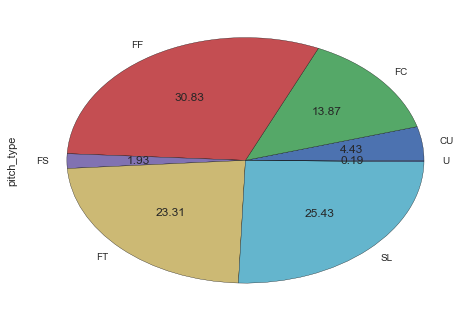

In [69]:
# グラフ化する(2016/04-07)
pitch2016_04_07_pitch_type = pitch2016_04_07.pitch_type.groupby(pitch2016_04_07.pitch_type).count()
pitch2016_04_07_pitch_type.plot.pie(autopct='%.2f')

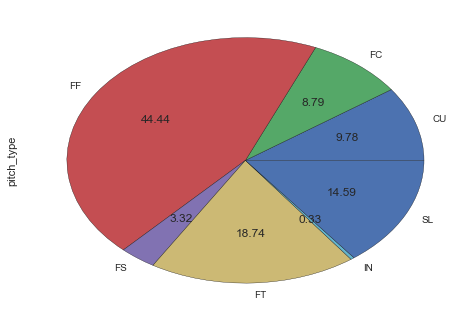

In [70]:
# グラフ化する(2016/08)
pitch2016_08_pitch_type = pitch2016_08.pitch_type.groupby(pitch2016_08.pitch_type).count()
pitch2016_08_pitch_type.plot.pie(autopct='%.2f')

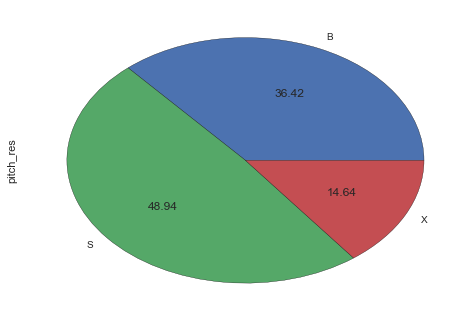

In [72]:
# グラフ化する(2016/04-07)
pitch2016_04_07_pitch_res = pitch2016_04_07.pitch_res.groupby(pitch2016_04_07.pitch_res).count()
pitch2016_04_07_pitch_res.plot.pie(autopct='%.2f')

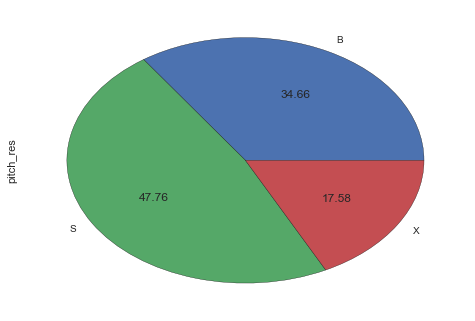

In [73]:
# グラフ化する(2016/08)
pitch2016_08_pitch_res = pitch2016_08.pitch_res.groupby(pitch2016_08.pitch_res).count()
pitch2016_08_pitch_res.plot.pie(autopct='%.2f')

In [77]:
pitch2013_pitch_des = pitch2013.query("pitch_type=='FF'").pitch_des.groupby(pitch2013.pitch_des).count()

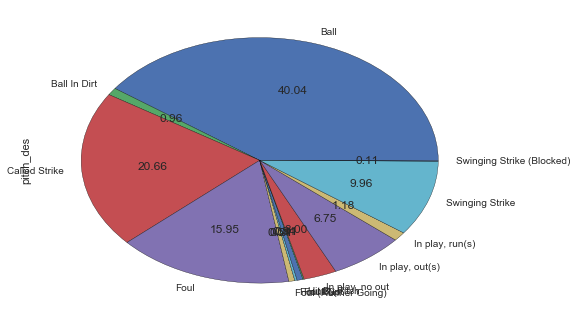

In [82]:
pitch2013_pitch_des.plot.pie(autopct='%.2f')

In [80]:
pitch2013.query("pitch_type=='FF'")

Unnamed: 0  Unnamed: 0.1 retro_game_id  year  month  day st_fl  \
0          28172          1742  HOU201304020  2013      4    2     F   
1          28173          1743  HOU201304020  2013      4    2     F   
16         28208          1778  HOU201304020  2013      4    2     F   
17         28209          1779  HOU201304020  2013      4    2     F   
18         28210          1780  HOU201304020  2013      4    2     F   
29         28221          1791  HOU201304020  2013      4    2     F   
30         28222          1792  HOU201304020  2013      4    2     F   
31         28223          1793  HOU201304020  2013      4    2     F   
46         28277          1847  HOU201304020  2013      4    2     F   
47         28278          1848  HOU201304020  2013      4    2     F   
48         28279          1849  HOU201304020  2013      4    2     F   
53         28284          1854  HOU201304020  2013      4    2     F   
60         28291          1861  HOU201304020  2013      4    2     F   
67         28317          1887  HOU201304020  2013      4    2     F   
76         28332          1902  HOU201304020  2013      4    2     F   
81         28337          1907  HOU201304020  2013      4    2     F   
87         28366          1936  HOU201304020  2013      4    2     F   
95         28395          1965  HOU201304020  2013      4    2     F   
97         28397          1967  HOU201304020  2013      4    2     F   
111        44881             0  TEX201304070  2013      4    7     F   
114        44884             3  TEX201304070  2013      4    7     F   
121        44891            10  TEX201304070  2013      4    7     F   
122        44892            11  TEX201304070  2013      4    7     F   
123        44893            12  TEX201304070  2013      4    7     F   
126        44896            15  TEX201304070  2013      4    7     F   
130        44900            19  TEX201304070  2013      4    7     F   
132        44902            21  TEX201304070  2013      4    7     F   
133        44925            44  TEX201304070  2013      4    7     F   
138        44930            49  TEX201304070  2013      4    7     F   
142        44934            53  TEX201304070  2013      4    7     F   
143        44935            54  TEX201304070  2013      4    7     F   
145        44937            56  TEX201304070  2013      4    7     F   
146        44938            57  TEX201304070  2013      4    7     F   
157        44970            89  TEX201304070  2013      4    7     F   
166        44979            98  TEX201304070  2013      4    7     F   
183        45038           157  TEX201304070  2013      4    7     F   
190        45045           164  TEX201304070  2013      4    7     F   
193        45048           167  TEX201304070  2013      4    7     F   
196        66373          3534  SEA201304120  2013      4   12     F   
201        66378          3539  SEA201304120  2013      4   12     F   
220        66397          3558  SEA201304120  2013      4   12     F   
221        66398          3559  SEA201304120  2013      4   12     F   
223        66400          3561  SEA201304120  2013      4   12     F   
226        66412          3573  SEA201304120  2013      4   12     F   
228        66414          3575  SEA201304120  2013      4   12     F   
230        66416          3577  SEA201304120  2013      4   12     F   
234        66420          3581  SEA201304120  2013      4   12     F   
245        66438          3599  SEA201304120  2013      4   12     F   
247        66440          3601  SEA201304120  2013      4   12     F   
251        66444          3605  SEA201304120  2013      4   12     F   
253        66446          3607  SEA201304120  2013      4   12     F   
262        66474          3635  SEA201304120  2013      4   12     F   
263        66475          3636  SEA201304120  2013      4   12     F   
265        66477          3638  SEA201304120  2013      4   12     F   
304        91293          2430  TEX201304190  

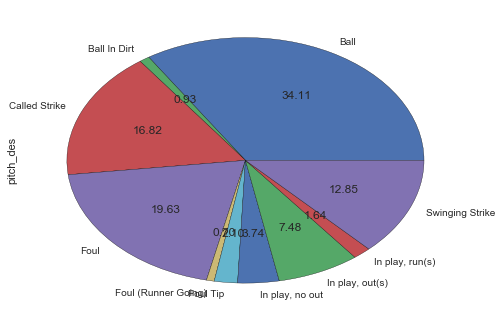

In [83]:
pitch2016_pitch_des = pitch2016.query("pitch_type=='FF'").pitch_des.groupby(pitch2016.pitch_des).count()
pitch2016_pitch_des.plot.pie(autopct='%.2f')